In [ ]:
# Xin quyen Google drive
from google.colab import drive
drive.mount('/content/ggdrive')

Mounted at /content/ggdrive


In [ ]:
import pandas as pd

df = pd.read_csv(
    '/content/ggdrive/MyDrive/Phân tích dữ liệu lớn/Student Depression Dataset.csv'
)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
#Tóm lược dữ liệu
df_num = df.select_dtypes(include='number')
data_num = df_num.describe()
data_num.head(10)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [ ]:
#Đếm dữ liệu khuyết
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
#Thay giá trị khuyết bằng giá trị trung bình
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mean())
#Đếm xem còn giá trị khuyết nữa hay không
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


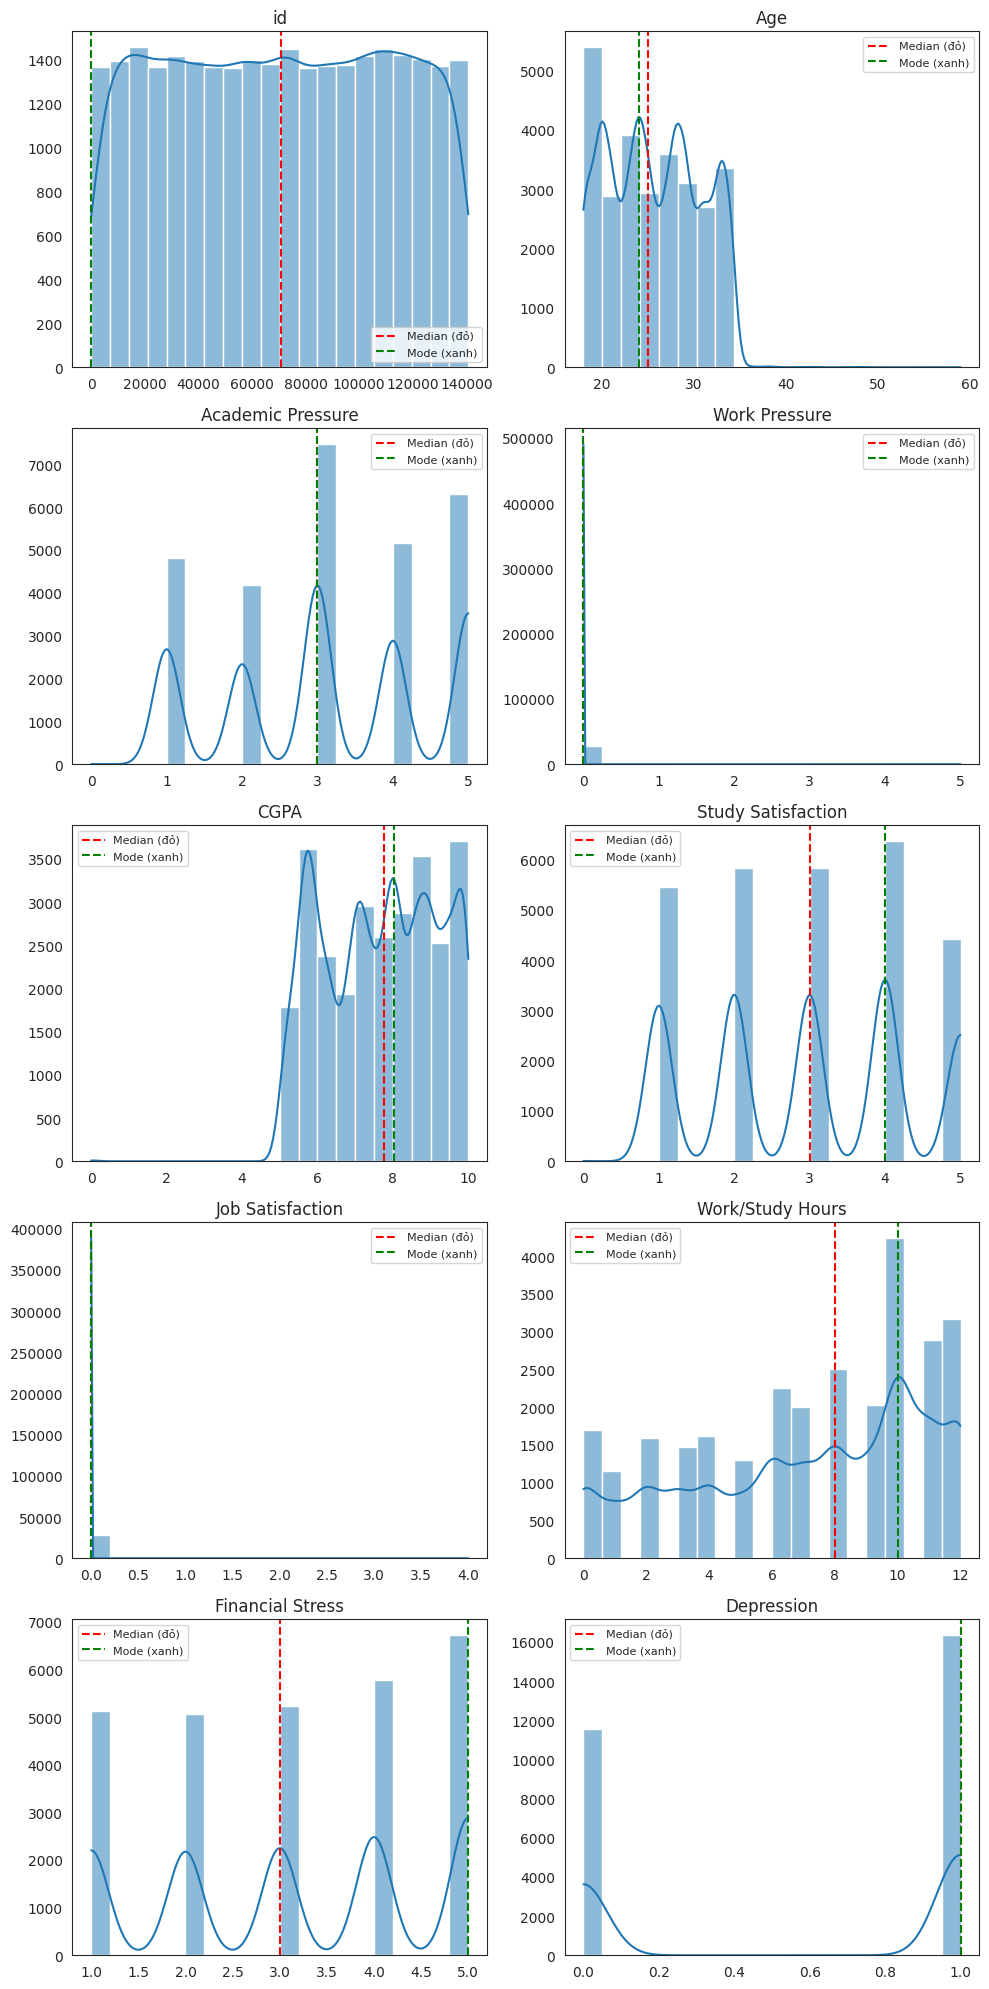

In [ ]:
#Vẽ biểu đồ Histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns
# Số biểu đồ mỗi hàng
cols = 2
rows = (len(numeric_cols) + cols - 1) // cols

# Kích thước tổng thể
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=20)

    median_val = df[col].median()
    mode_val = df[col].mode()[0]

    plt.axvline(median_val, color='red', linestyle='--', label='Median (đỏ)')
    plt.axvline(mode_val, color='green', linestyle='--', label='Mode (xanh)')

    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


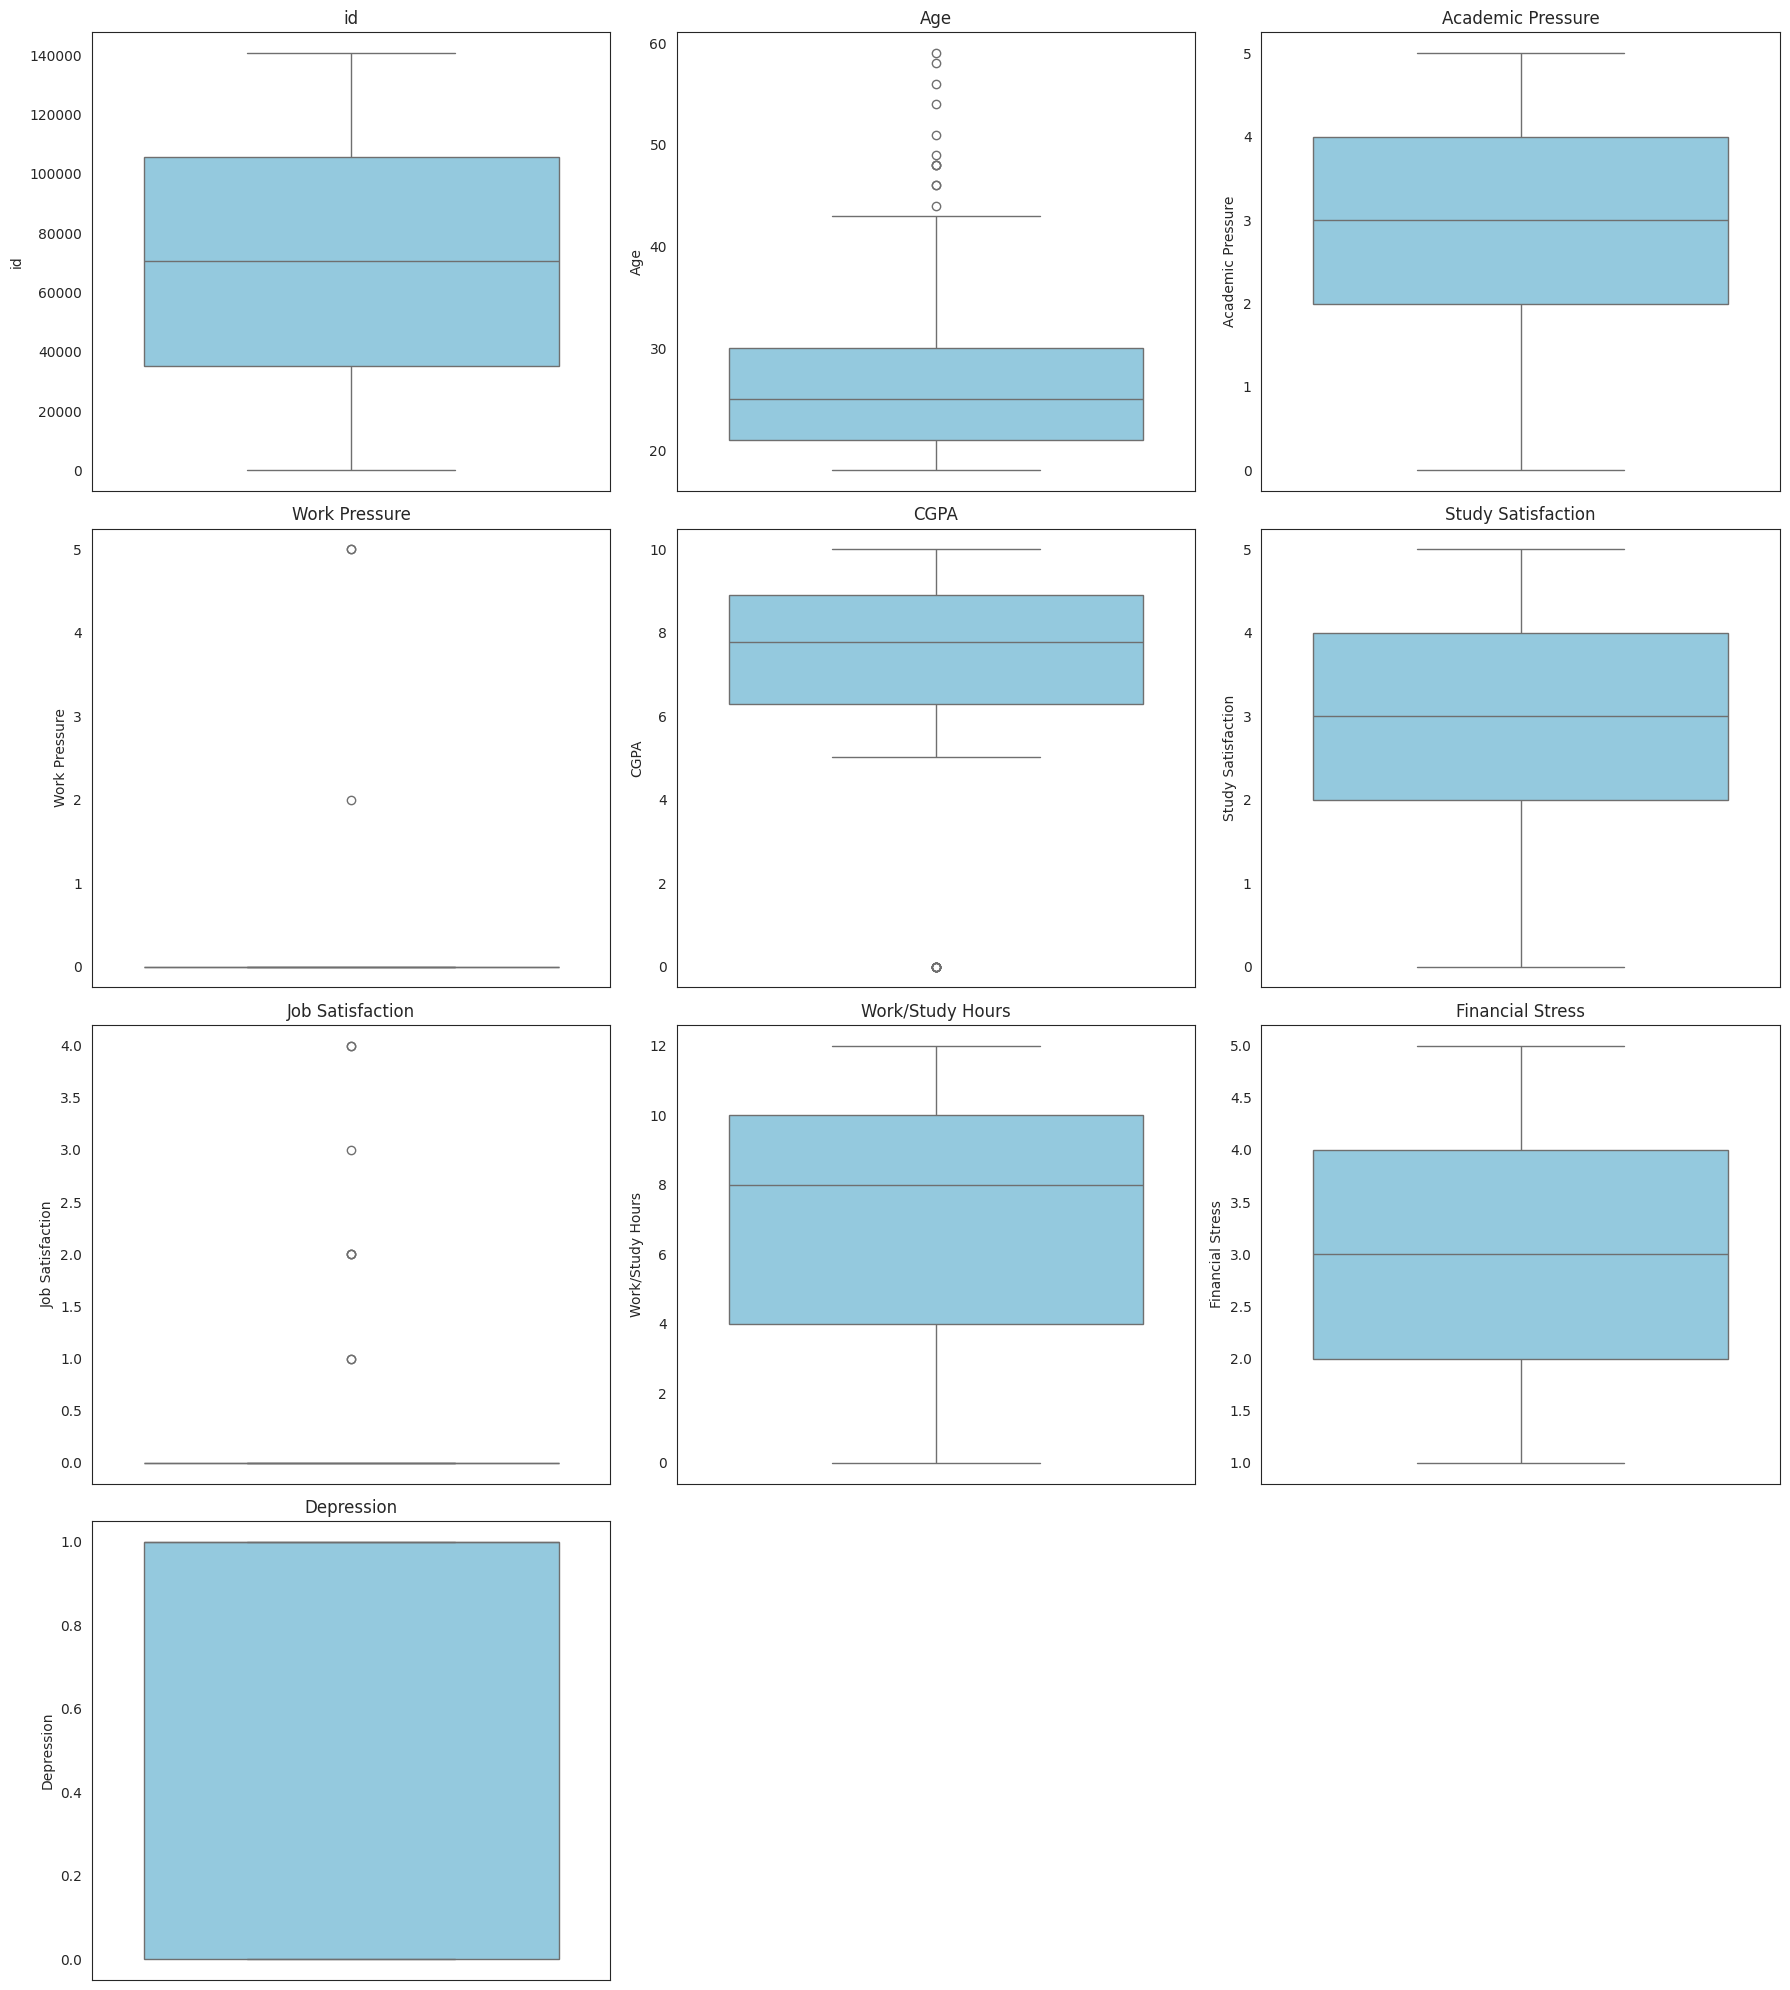

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Lấy danh sách các cột dạng số
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Số biểu đồ mỗi hàng
plots_per_row = 3

# Tính số hàng cần thiết
n_rows = math.ceil(len(numeric_cols) / plots_per_row)

# Thiết lập kích thước tổng thể
plt.figure(figsize=(plots_per_row * 6, n_rows * 5))

# Vẽ từng biểu đồ
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, plots_per_row, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
df_original = df.copy()

In [ ]:
# Lmà sạch và xử lý outliers
# Processing outliers
import numpy as np

z_threshold = 3
float_cols = df.select_dtypes(include=['number']).columns

for col in float_cols:
    # Tính trung bình và độ lệch chuẩn của cột
    mean = df[col].mean()
    std = df[col].std()

    # Tính Z-score
    z_scores = (df[col] - mean) / std

    # Xác định các chỉ số vượt ngưỡng Z-score
    index_lower = np.where(z_scores < -z_threshold)[0]
    index_upper = np.where(z_scores > z_threshold)[0]

    # In số lượng outliers
    print(col + ":", len(index_lower), len(index_upper))

    # Xử lý outliers: Thay thế bằng ngưỡng
    lower_threshold = mean - z_threshold * std
    upper_threshold = mean + z_threshold * std
    df.loc[index_lower, col] = lower_threshold
    df.loc[index_upper, col] = upper_threshold


id: 0 0
Age: 0 19
Academic Pressure: 0 0
Work Pressure: 0 3
CGPA: 9 0
Study Satisfaction: 0 0
Job Satisfaction: 0 8
Work/Study Hours: 0 0
Financial Stress: 0 0
Depression: 0 0


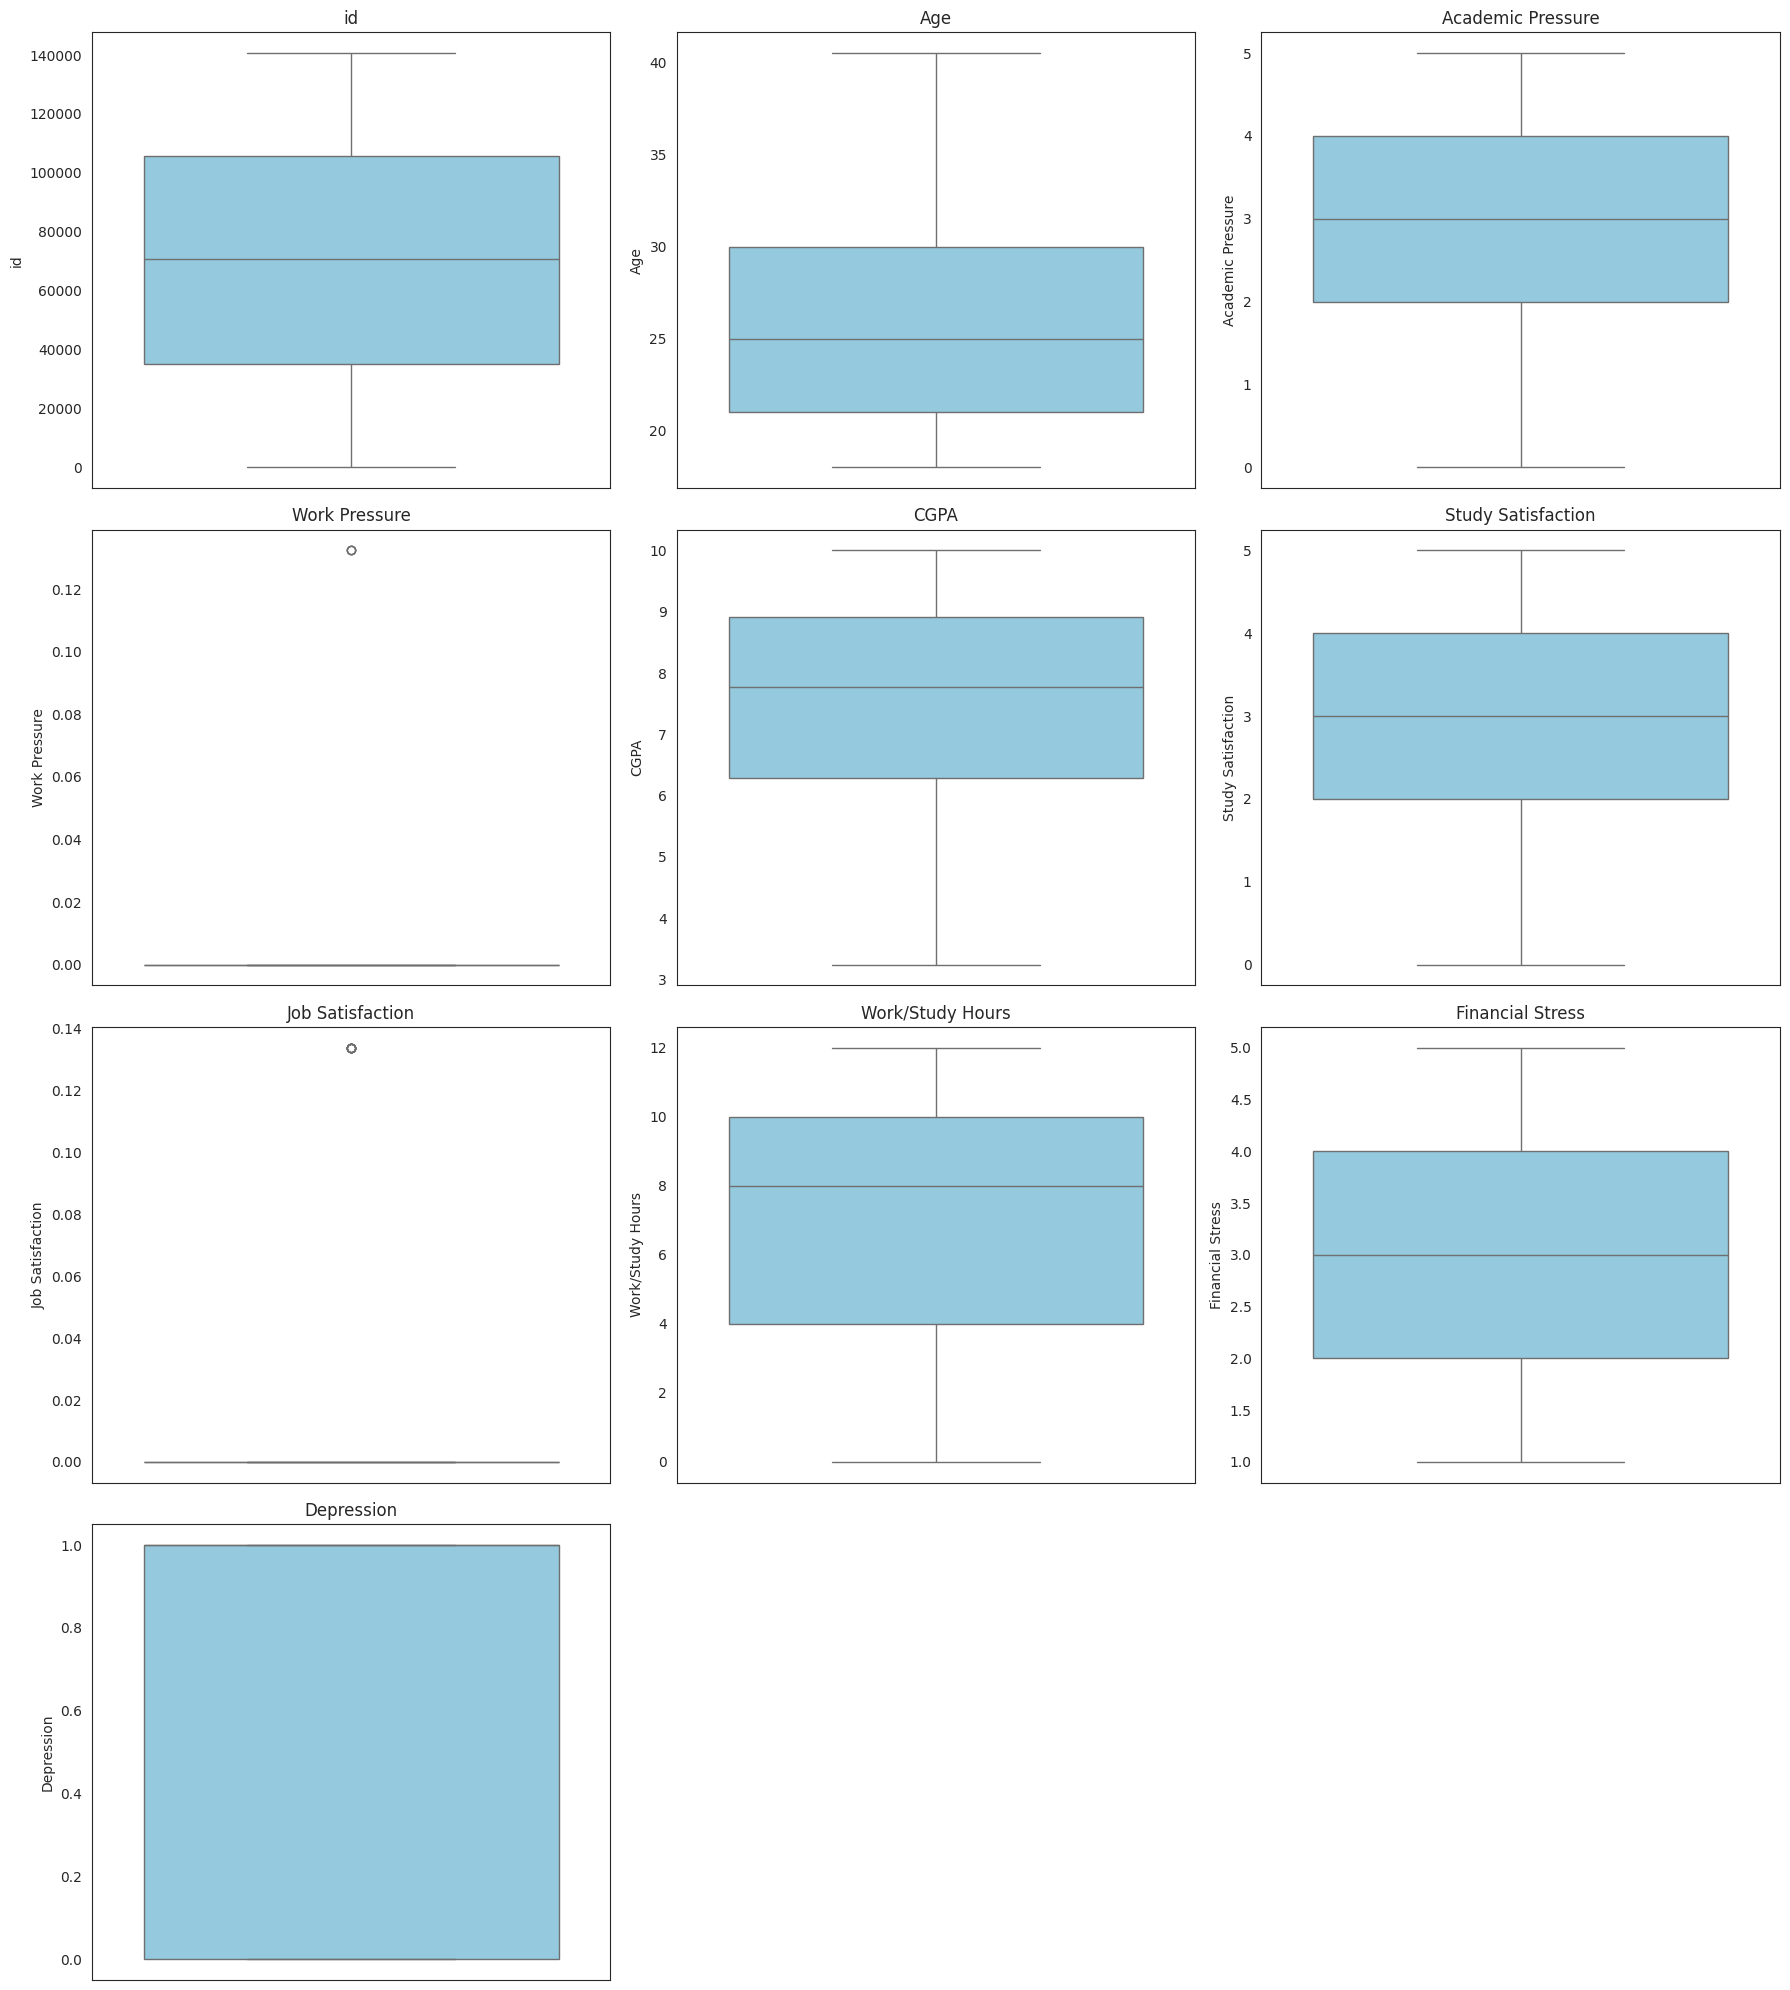

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Lấy danh sách các cột dạng số
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Số biểu đồ mỗi hàng
plots_per_row = 3

# Tính số hàng cần thiết
n_rows = math.ceil(len(numeric_cols) / plots_per_row)

# Thiết lập kích thước tổng thể
plt.figure(figsize=(plots_per_row * 6, n_rows * 5))

# Vẽ từng biểu đồ
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, plots_per_row, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter


# === 2. Tiền xử lý: Label Encoding cho biến phân loại ===
df_encoded = pd.get_dummies(df, drop_first=True)

# === 3. Tách đặc trưng và nhãn ===
X = df_encoded.drop(columns=['Depression'])
y = df_encoded['Depression']

# === 4. Resample bằng SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# === 5. Gộp lại DataFrame sau xử lý ===
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.Series(y_resampled, name='Depression')], axis=1)


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

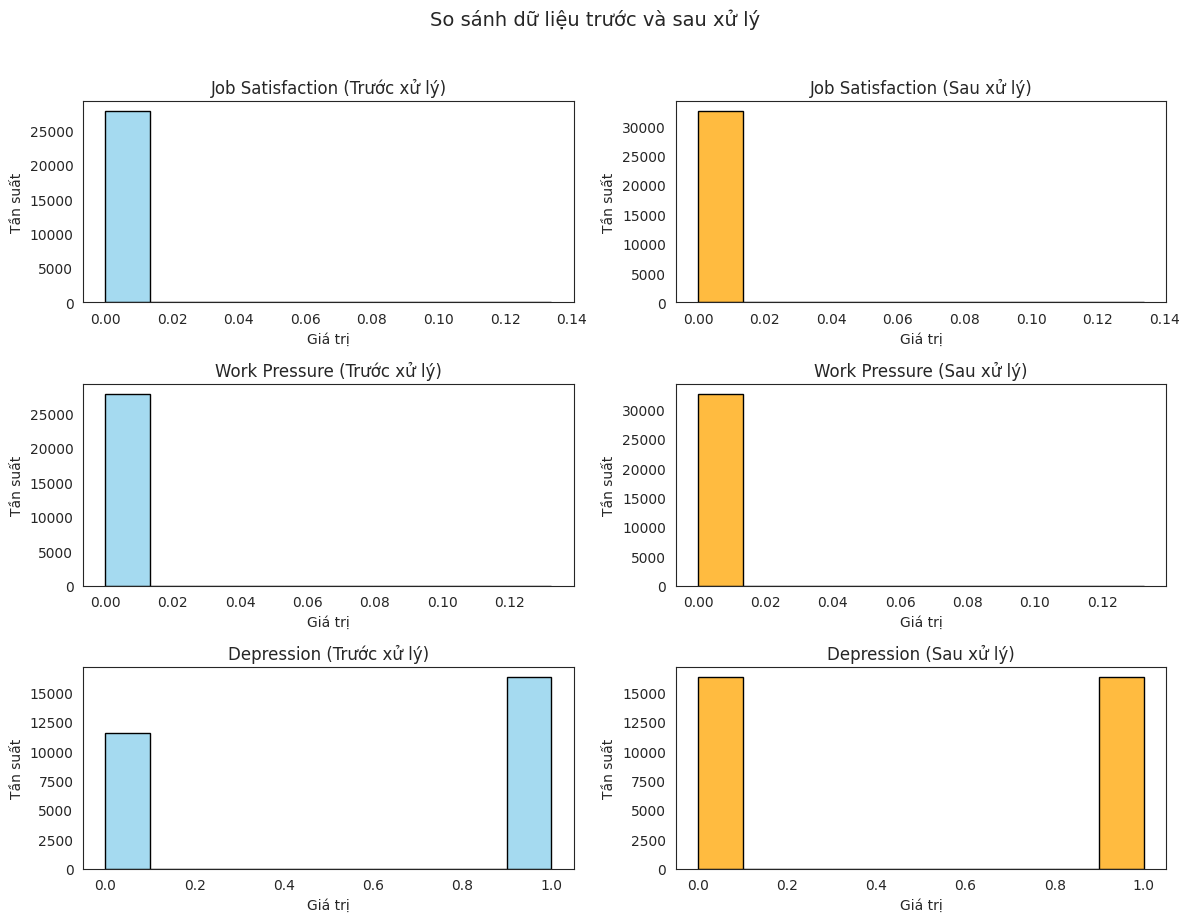

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_column_distributions(before_df, after_df, columns, title='So sánh dữ liệu trước và sau xử lý'):
    num_cols = len(columns)
    plt.figure(figsize=(12, num_cols * 3))

    for i, col in enumerate(columns):
        # Biểu đồ trước xử lý
        plt.subplot(num_cols, 2, 2 * i + 1)
        sns.histplot(before_df[col], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'{col} (Trước xử lý)')
        plt.xlabel('Giá trị')
        plt.ylabel('Tần suất')

        # Biểu đồ sau xử lý
        plt.subplot(num_cols, 2, 2 * i + 2)
        sns.histplot(after_df[col], bins=10, color='orange', edgecolor='black')
        plt.title(f'{col} (Sau xử lý)')
        plt.xlabel('Giá trị')
        plt.ylabel('Tần suất')

    plt.suptitle(title, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
df_before = df.copy()            # Trước xử lý
df_after = df_resampled.copy()   # Sau xử lý
columns_to_plot = ['Job Satisfaction', 'Work Pressure', 'Depression']
plot_column_distributions(df_before, df_after, columns_to_plot)

# LÀM TỪ ĐÂY, KO VIẾT VÀO PHẦN TRÊN CỦA T

đây, làm từ đây


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Label Encoding cho biến phân loại (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Tách đặc trưng (X) và nhãn (y)
X = df_encoded.drop(columns=['Depression'])
y = df_encoded['Depression']

# 3. In thống kê trước khi xử lý
print("Trước SMOTE:", Counter(y))

# 4. Áp dụng SMOTE lên toàn bộ đặc trưng
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 5. In thống kê sau khi xử lý
print("Sau SMOTE:", Counter(y_resampled))

# 6. Gộp lại thành DataFrame sau xử lý
df_resampled = pd.concat([
    pd.DataFrame(X_resampled, columns=X.columns),
    pd.Series(y_resampled, name='Depression')
], axis=1)


Trước SMOTE: Counter({1: 16336, 0: 11565})
Sau SMOTE: Counter({1: 16336, 0: 16336})


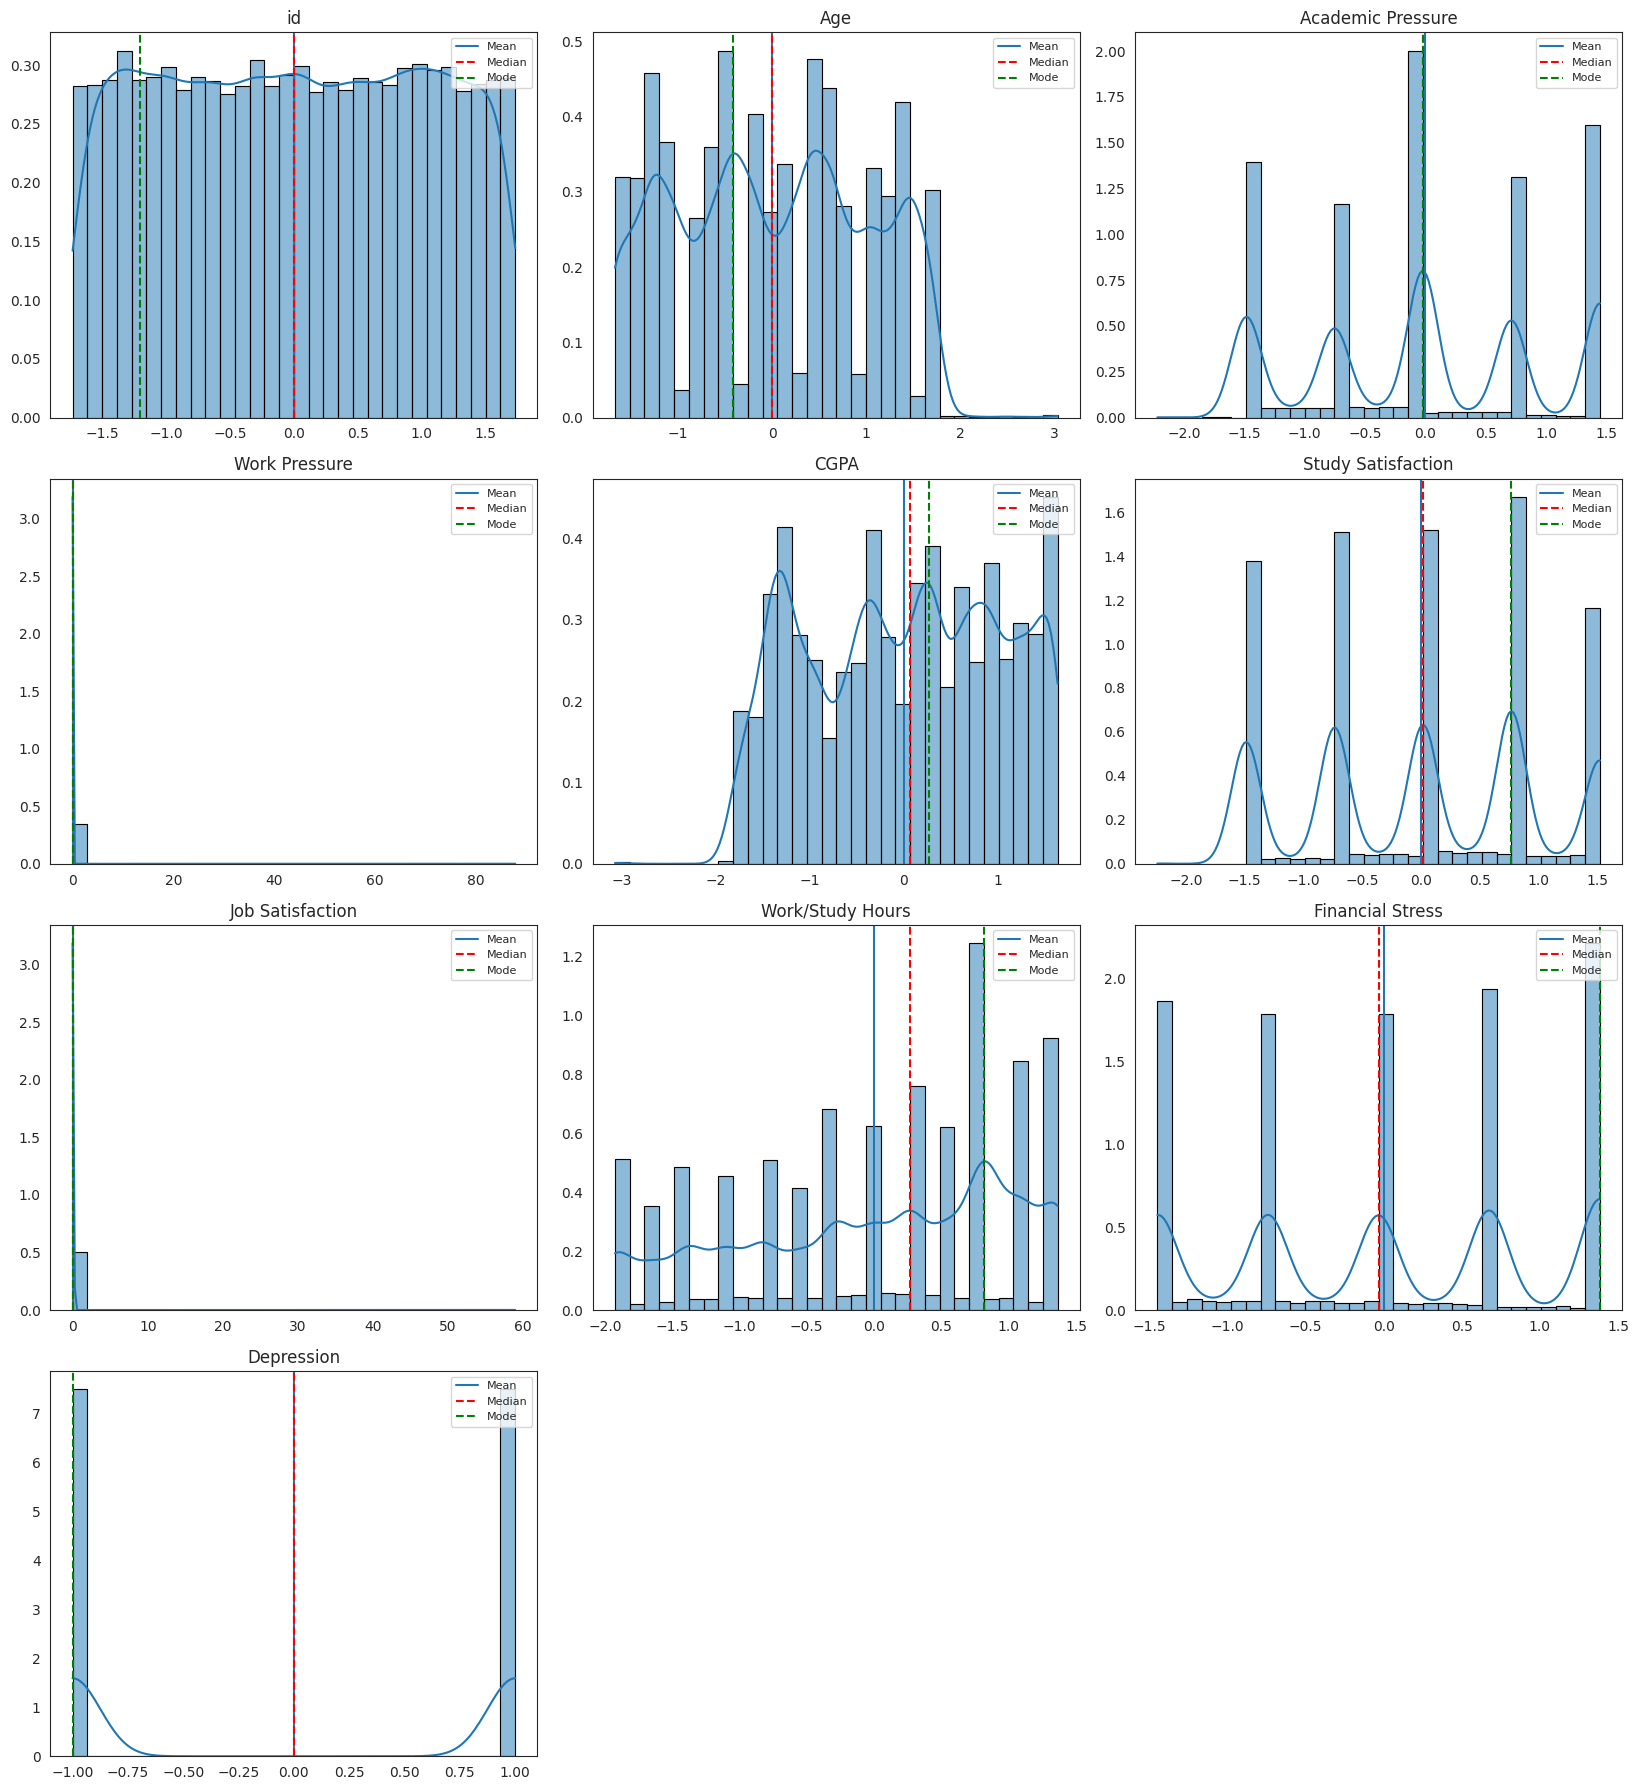

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Tắt grid bằng cách đặt style đơn giản
sns.set_style("white")  # hoặc "ticks" cũng đẹp

# Chuẩn hóa dữ liệu (z-score)
df_normalized = df_resampled.copy()
numeric_cols = df_normalized.select_dtypes(include='number').columns
df_normalized[numeric_cols] = df_normalized[numeric_cols].apply(zscore)

# Thiết lập bố cục biểu đồ
cols = 3
rows = (len(numeric_cols) + cols - 1) // cols
plt.figure(figsize=(cols * 5.5, rows * 4.5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)

    # Vẽ histogram và KDE
    sns.histplot(df_normalized[col], kde=True, bins=30, stat='density', edgecolor='black')

    # Vẽ các đường: mean, median, mode
    mean_val = df_normalized[col].mean()
    median_val = df_normalized[col].median()
    mode_val = df_normalized[col].mode()[0]

    plt.axvline(mean_val, linestyle='-', label='Mean')
    plt.axvline(median_val, color='red', linestyle='--', label='Median')
    plt.axvline(mode_val, color='green', linestyle='--', label='Mode')

    # Giao diện trực quan
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(fontsize=8, loc='upper right')
    plt.grid(False)  # Tắt grid trong mỗi subplot

plt.tight_layout()
plt.show()


In [ ]:
df_resampled.drop(columns=['Work Pressure', 'Job Satisfaction'], inplace=True)


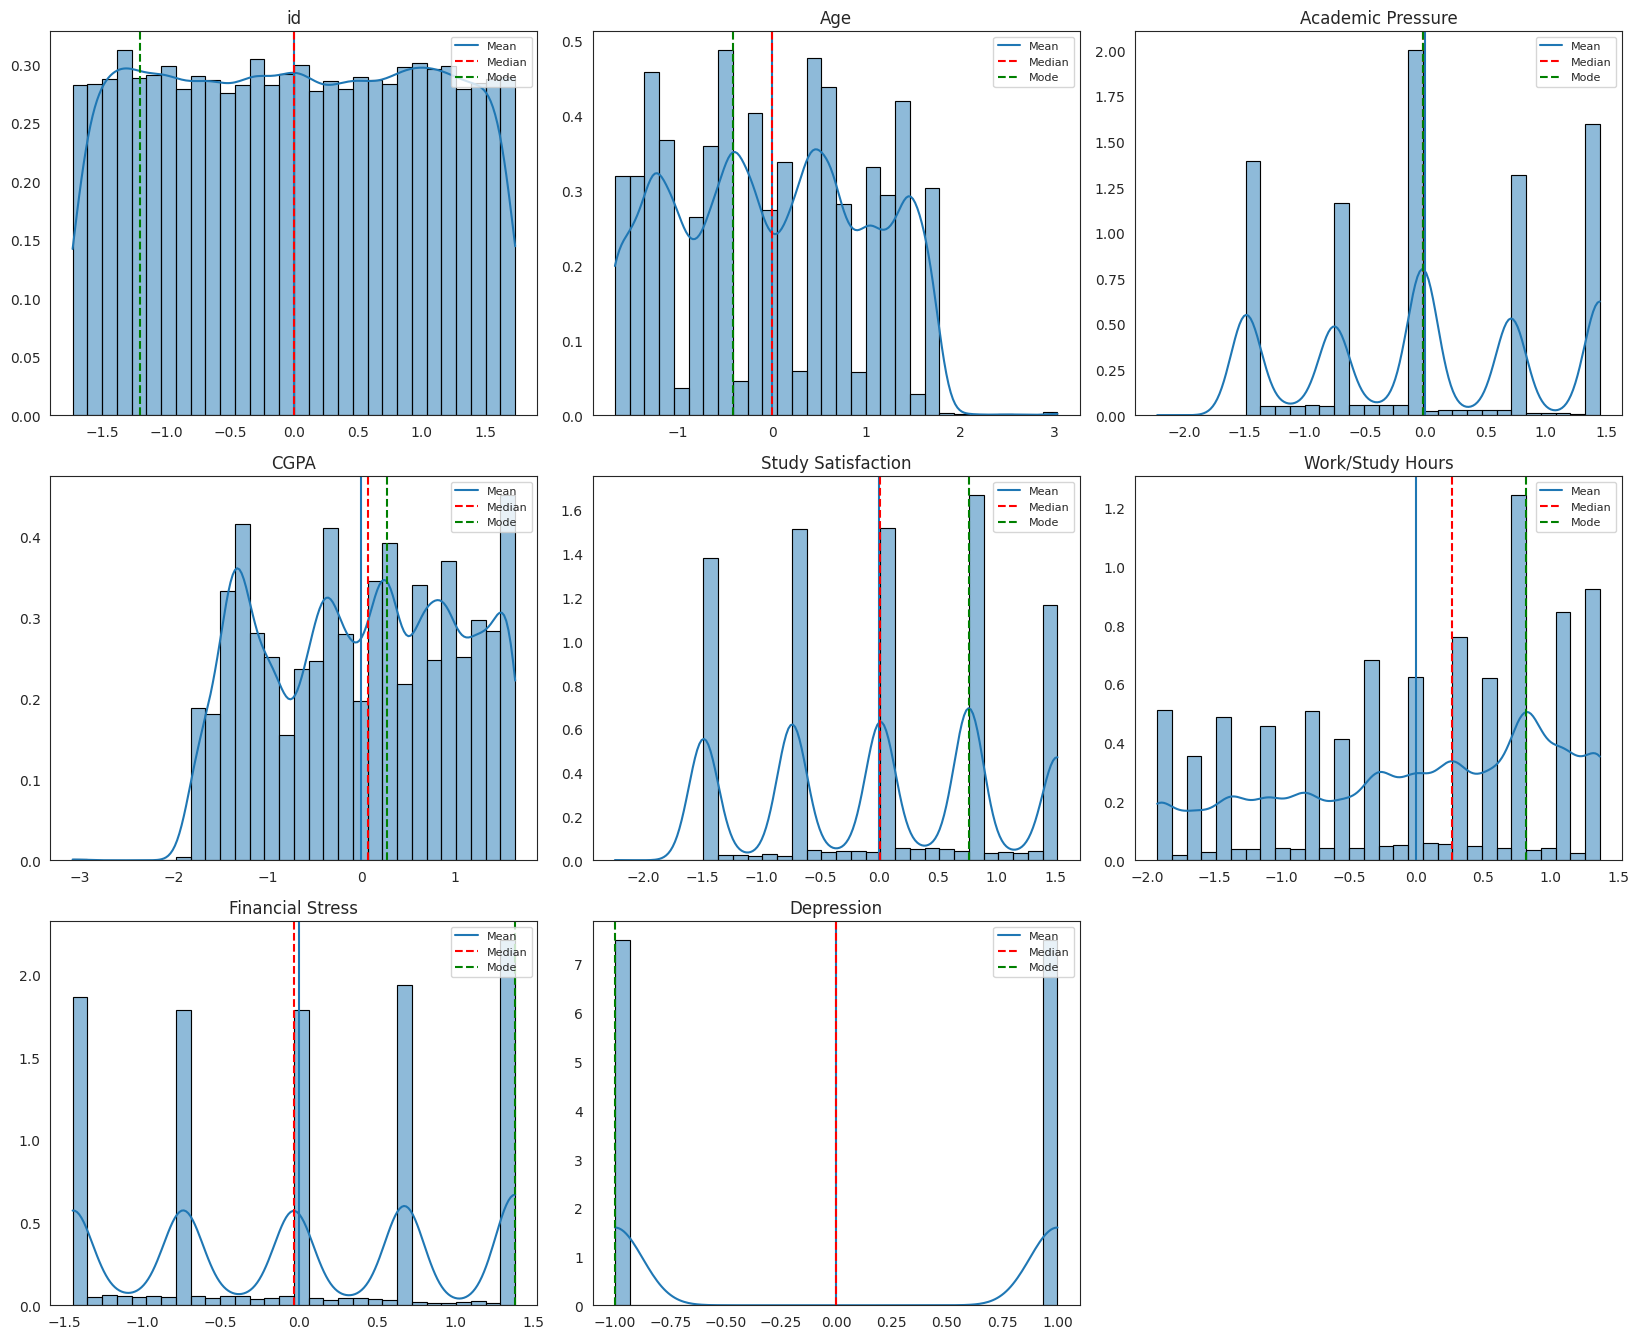

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Tắt grid bằng cách đặt style đơn giản
sns.set_style("white")  # hoặc "ticks" cũng đẹp

# Chuẩn hóa dữ liệu (z-score)
df_normalized = df_resampled.copy()
numeric_cols = df_normalized.select_dtypes(include='number').columns
df_normalized[numeric_cols] = df_normalized[numeric_cols].apply(zscore)

# Thiết lập bố cục biểu đồ
cols = 3
rows = (len(numeric_cols) + cols - 1) // cols
plt.figure(figsize=(cols * 5.5, rows * 4.5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)

    # Vẽ histogram và KDE
    sns.histplot(df_normalized[col], kde=True, bins=30, stat='density', edgecolor='black')

    # Vẽ các đường: mean, median, mode
    mean_val = df_normalized[col].mean()
    median_val = df_normalized[col].median()
    mode_val = df_normalized[col].mode()[0]

    plt.axvline(mean_val, linestyle='-', label='Mean')
    plt.axvline(median_val, color='red', linestyle='--', label='Median')
    plt.axvline(mode_val, color='green', linestyle='--', label='Mode')

    # Giao diện trực quan
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(fontsize=8, loc='upper right')
    plt.grid(False)  # Tắt grid trong mỗi subplot

plt.tight_layout()
plt.show()


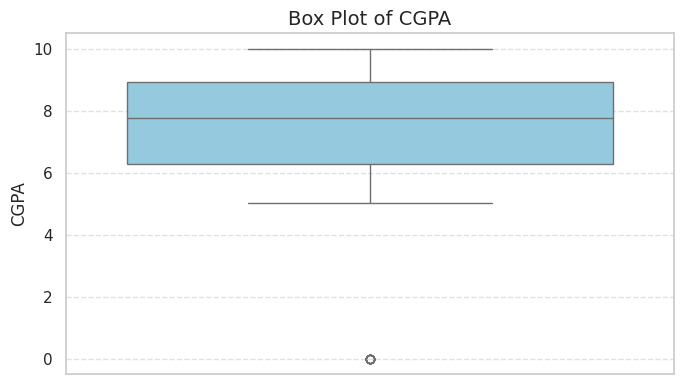

In [ ]:
##MÔ TẢ
import seaborn as sns
import matplotlib.pyplot as plt
# Các cột dạng số muốn vẽ boxplot
column = 'CGPA'
# Vẽ biểu đồ hộp đơn
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.boxplot(y=df[column], color='skyblue')

plt.title(f"Box Plot of {column}", fontsize=14)
plt.ylabel(column)
plt.xlabel("")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

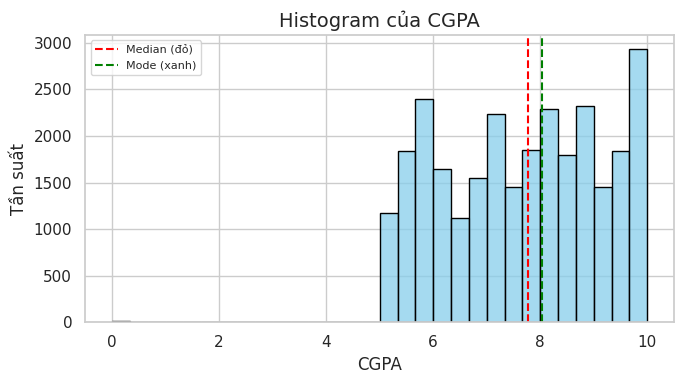

In [ ]:
#Vẽ biểu đồ Histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col = 'CGPA'

# Tạo hình
plt.figure(figsize=(7, 4))
sns.histplot(df[col], bins=30, kde=False, color='skyblue', edgecolor='black')

# Tính median và mode
median_val = df[col].median()
mode_val = df[col].mode()[0]

# Vẽ đường thẳng median và mode
plt.axvline(median_val, color='red', linestyle='--', label='Median (đỏ)')
plt.axvline(mode_val, color='green', linestyle='--', label='Mode (xanh)')

# Gán tiêu đề và nhãn trục
plt.title(f'Histogram của {col}', fontsize=14)
plt.xlabel(col)
plt.ylabel('Tần suất')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


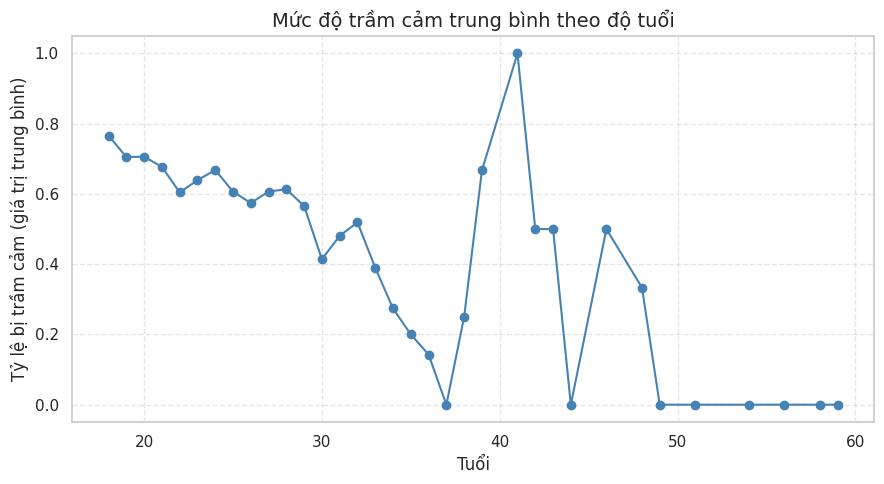

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Tính tỷ lệ trầm cảm trung bình theo từng độ tuổi
age_dep = df.groupby('Age')['Depression'].mean().reset_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(9, 5))
plt.plot(age_dep['Age'], age_dep['Depression'], marker='o', color='steelblue')
plt.title('Mức độ trầm cảm trung bình theo độ tuổi', fontsize=14)
plt.xlabel('Tuổi')
plt.ylabel('Tỷ lệ bị trầm cảm (giá trị trung bình)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


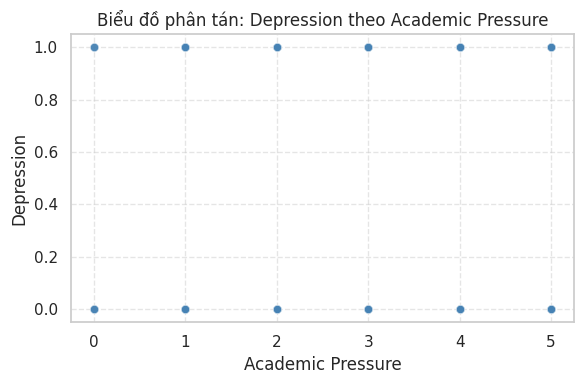

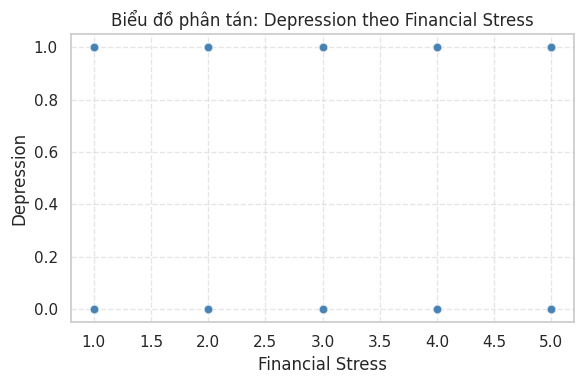

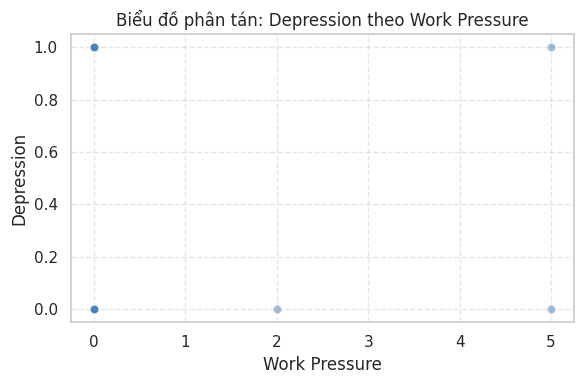

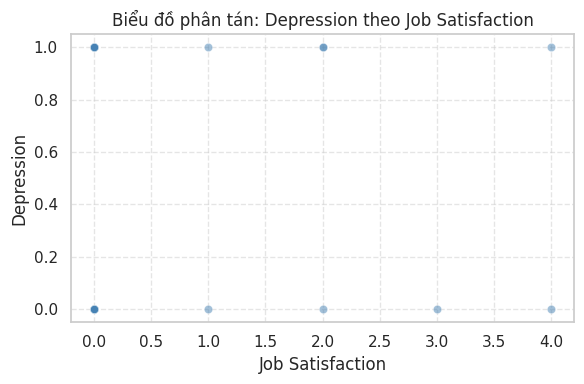

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pairs = [
    ('Academic Pressure', 'Depression'),
    ('Financial Stress', 'Depression'),
    ('Work Pressure', 'Depression'),
    ('Job Satisfaction', 'Depression')
]

# Vẽ từng biểu đồ scatter
for x_var, y_var in pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[x_var], y=df[y_var], alpha=0.5, color='steelblue')
    plt.title(f'Biểu đồ phân tán: {y_var} theo {x_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


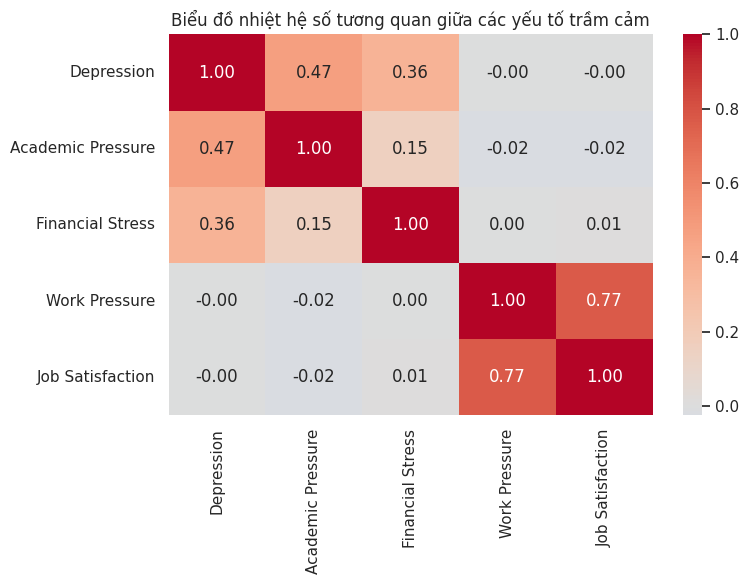

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



cols = ['Depression', 'Academic Pressure', 'Financial Stress',
        'Work Pressure', 'Job Satisfaction']

plt.figure(figsize=(8, 6))
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Biểu đồ nhiệt hệ số tương quan giữa các yếu tố trầm cảm")
plt.tight_layout()
plt.show()
